In [2]:
import numpy as np
import pandas as pd

In [1]:
#1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [3]:
df = pd.read_csv('Batting (1).csv')

In [3]:
#2)	Print out the dimensions and info about the dataframe you just created

In [4]:
df.shape

(102816, 25)

In [5]:
df.info

<bound method DataFrame.info of          playerID  nameFirst     nameLast  birthYear  yearID  stint teamID  \
0       abercda01      Frank  Abercrombie       1850    1871      1    TRO   
1        addybo01        Bob         Addy       1842    1871      1    RC1   
2       allisar01        Art      Allison       1849    1871      1    CL1   
3       allisdo01       Doug      Allison       1846    1871      1    WS3   
4       ansonca01        Cap        Anson       1852    1871      1    RC1   
5       armstbo01     Robert    Armstrong       1850    1871      1    FW1   
6       barkeal01         Al       Barker       1839    1871      1    RC1   
7       barnero01       Ross       Barnes       1850    1871      1    BS1   
8       barrebi01       Bill      Barrett          0    1871      1    FW1   
9       barrofr01      Frank      Barrows       1844    1871      1    BS1   
10       bassjo01       John         Bass       1848    1871      1    CL1   
11      battijo01        Joe    

In [4]:
#3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [89]:
#Grouping to get totals for each season
season_df = df.groupby(['yearID', 'playerID'], as_index = False)['HR'].sum()
#Filtering the data
season_df = season_df[season_df['HR']>=40]
#Finding unique players
season_df['playerID'].nunique()

142

In [5]:
#4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [90]:
#Summing data by playerid
career_df = df.groupby(['playerID','nameFirst','nameLast'], as_index = False)['HR'].sum()
#Applying filter
career_df = career_df[career_df['HR']>=600]
#Displaying dataframe
display(career_df[['playerID','nameFirst','nameLast','HR']].reset_index(drop=True))

,playerID,nameFirst,nameLast,HR
0,aaronha01,Hank,Aaron,755
1,bondsba01,Barry,Bonds,762
2,griffke02,Ken,Griffey,630
3,mayswi01,Willie,Mays,660
4,rodrial01,Alex,Rodriguez,696
5,ruthba01,Babe,Ruth,714
6,sosasa01,Sammy,Sosa,609
7,thomeji01,Jim,Thome,612


In [19]:
#5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [86]:
#Filtering data by season and conditions
newdf = df.groupby(['yearID', 'playerID'], as_index = False)['2B','3B','H','HR'].sum()
newdf[(newdf['2B']>=40) & (newdf['3B']>=10) & (newdf['H']>=200) & (newdf['HR']>=30)]['playerID'].nunique()

11

In [7]:
#6)	How many players seasons have had 100 or more SBs? 
#(Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [99]:
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False)['SB'].sum()
newdf = newdf[newdf['SB']>=100]
display(newdf[['nameFirst','nameLast','yearID','SB']].sort_values(by=['SB'], ascending = False).reset_index(drop = True))

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,John,Ward,1887,111.0
6,Billy,Hamilton,1889,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


In [8]:
#7)	How many players in the 1960s (yearID) have hit 200 or more HRs? 
#(Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [4]:
newdf = df[(df['yearID']>=1960) & (df['yearID']<1970)]
newdf = newdf.groupby(['playerID','nameFirst','nameLast'],as_index = False)['HR'].sum()
display(newdf[newdf['HR']>=200][['nameFirst','nameLast','HR']].sort_values(by=['HR'],ascending=False).reset_index(drop=True))

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [9]:
#8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [122]:
newdf = df.groupby(['playerID','nameFirst','nameLast'], as_index=False)['HR'].sum()
display(newdf[['nameFirst','nameLast','HR']].sort_values(by=['HR'], ascending = False).reset_index(drop=True).head(1))

,nameFirst,nameLast,HR
0,Barry,Bonds,762


In [10]:
#9)	Who had the most hits in the 1970s? (Dataframe)

In [5]:
newdf = df[(df['yearID']>=1970) & (df['yearID']<1980)]
newdf = newdf.groupby(['playerID','nameFirst','nameLast'], as_index = False)['H'].sum().sort_values(by=['H'], ascending=False).reset_index(drop=True).head(1)
newdf

,playerID,nameFirst,nameLast,H
0,rosepe01,Pete,Rose,2045


In [11]:
#10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
#(Dataframe, first name, last name, OBP, ordered descending by OBP)

In [6]:
#OBP = H + BB + HBP / AB + BB + HBP + SF
#PA = AB + BB + HBP + SH + SF
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = newdf[newdf['yearID'] == 1977]
newdf['PA'] = newdf['AB'] + newdf['BB'] + newdf['HBP'] + newdf['SH'] + newdf['SF']
newdf['OBP'] = ( newdf['H'] + newdf['BB'] + newdf['HBP'] ) / (newdf['AB'] + newdf['BB'] + newdf['HBP'] + newdf['SF'])
newdf = newdf[newdf['PA']>=500]
display(newdf[['playerID','nameFirst', 'nameLast','OBP']].sort_values(by =['OBP'], ascending = False).reset_index(drop=True).head(5))


,playerID,nameFirst,nameLast,OBP
0,carewro01,Rod,Carew,0.448773
1,singlke01,Ken,Singleton,0.437788
2,smithre06,Reggie,Smith,0.426910
3,hargrmi01,Mike,Hargrove,0.420312
4,morgajo02,Joe,Morgan,0.417054


In [12]:
#11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [110]:
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = newdf[newdf['yearID']==2013]
newdf['PA'] = newdf['AB'] + newdf['BB'] + newdf['HBP'] + newdf['SH'] + newdf['SF']
df_pa = newdf[newdf['PA']>=300]
df_pa['Averages'] = df_pa['H']/df_pa['AB']
display(df_pa[['nameFirst','nameLast','Averages']].sort_values(by=['Averages'], ascending = False).reset_index(drop=True).head(8))

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,Averages
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


In [13]:
#12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)
#(Dataframe, first name, last name, number of hits)

In [111]:
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = df[(df['yearID'] >=1940) & (df['yearID']<=1949)]
newdf = newdf.groupby(["playerID","nameFirst", 'nameLast'], as_index = False)[['H']].max()
newdf.sort_values(by = ['H'], ascending = False).reset_index(drop = True).head(10)

,playerID,nameFirst,nameLast,H
0,musiast01,Stan,Musial,230
1,holmeto01,Tommy,Holmes,224
2,travice01,Cecil,Travis,218
3,peskyjo01,Johnny,Pesky,208
4,vernomi01,Mickey,Vernon,207
5,dillibo01,Bob,Dillinger,207
6,stirnsn01,Snuffy,Stirnweiss,205
7,mitchda01,Dale,Mitchell,204
8,spencst01,Stan,Spence,203
9,robinja02,Jackie,Robinson,203


In [14]:
#13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [257]:
#Summing up hits
df1 = df.groupby(['playerID', "nameFirst", "nameLast", "yearID"] , as_index = False)['H'].sum()
#Finding max number of hits in an year
df2 = df1.groupby(["yearID"], as_index = False)['H'].max()

#Merging the two tables to get only the players with maximum hits
maxHits = pd.merge(df2, df1, how = "left", on = ['yearID', 'H'])
counts = maxHits.groupby(['playerID','nameFirst', 'nameLast'] , as_index = False)['yearID'].count().sort_values(by = ['yearID'], ascending = False)

new_columns = counts.columns.values
new_columns[3] = 'count' 
counts.columns = new_columns

frame = pd.merge(maxHits, counts, how = "left", on = ['playerID','nameFirst', 'nameLast'])
frame = frame.sort_values(by = ['count'], ascending = False).reset_index(drop=True).head(1)
display(frame[['playerID', 'nameFirst', 'nameLast', 'H', 'count']])

,playerID,nameFirst,nameLast,H,count
0,suzukic01,Ichiro,Suzuki,242,7


In [15]:
#14)	 Which players have played the most games for their careers?  
#Top 5 first name, last name, descending by games played presented as a dataframe

In [266]:
newdf = df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False)['G'].sum().sort_values(by = ['G'], ascending = False).reset_index(drop=True).head(5)
newdf

,playerID,nameFirst,nameLast,G
0,rosepe01,Pete,Rose,3562
1,yastrca01,Carl,Yastrzemski,3308
2,aaronha01,Hank,Aaron,3298
3,henderi01,Rickey,Henderson,3081
4,cobbty01,Ty,Cobb,3035


In [16]:
#15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [271]:
newdf = df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False)['H', 'HR'].sum()
newdf[(newdf['H']>=3000) & (newdf['HR']>=500)]['playerID'].nunique()

5

In [17]:
#16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [273]:
newdf = df[df['yearID'] == 1988]
newdf['HR'].sum()

3180

In [18]:
#17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [143]:
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = df[(df['nameFirst'] == 'Wade') & (df['nameLast'] == 'Boggs')]
newdf = newdf.groupby(['playerID','yearID','nameFirst','nameLast'], as_index = False)['AB', 'H'].sum()
newdf["Average"] = newdf['H']/newdf['AB']
newdf = newdf[newdf['AB']>=500]
display(newdf[["playerID", "nameFirst", "nameLast", "Average"]].sort_values(by = ["Average"], ascending = False).reset_index(drop=True).head(3))

,playerID,nameFirst,nameLast,Average
0,boggswa01,Wade,Boggs,0.367534
1,boggswa01,Wade,Boggs,0.366438
2,boggswa01,Wade,Boggs,0.362976


In [19]:
#18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending. 
#Dataframe with first name, last name, OBP

In [142]:
newdf = df[df['yearID'] == 1995]
newdf['PA'] = newdf['AB'] + newdf['BB'] + newdf['HBP'] + newdf['SH'] + newdf['SF']
dfpa = newdf[newdf['PA'] >= 400]
dfpa['OBP'] = ( dfpa['H'] + dfpa['BB'] + dfpa['HBP'] ) / (dfpa['AB'] + dfpa['BB'] + dfpa['HBP'] + dfpa['SF'])
display(dfpa[['playerID','nameFirst', 'nameLast', 'OBP']].sort_values(by=['OBP'], ascending = False).reset_index(drop=True).head(10))

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,playerID,nameFirst,nameLast,OBP
0,martied01,Edgar,Martinez,0.478873
1,thomafr04,Frank,Thomas,0.454405
2,mcgwima01,Mark,McGwire,0.440758
3,thomeji01,Jim,Thome,0.438061
4,bondsba01,Barry,Bonds,0.431496
5,salmoti01,Tim,Salmon,0.429467
6,davisch01,Chili,Davis,0.429119
7,magadda01,Dave,Magadan,0.427553
8,knoblch01,Chuck,Knoblauch,0.424483
9,naehrti01,Tim,Naehring,0.414729


In [20]:
#19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  
#I would like a dataframe with first name, last name, number of 3Bs

In [144]:
newdf = df.groupby(['yearID', 'playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = df[(df['yearID'] == 1922) | (df['yearID'] == 1925) | (df['yearID'] == 1926) | (df['yearID'] == 1928)]
newdf.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False)['3B'].sum().sort_values(by = '3B', ascending = False).reset_index(drop=True).head(1)


,playerID,nameFirst,nameLast,3B
0,walkecu01,Curt,Walker,59


In [21]:
#20)	How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [26]:
newdf = df.groupby(['yearID', 'playerID'], as_index = False)['HR','SB'].sum()
newdf[(newdf['HR']>=30) & (newdf['SB']>=30)]['playerID'].nunique()

38

In [22]:
#21. Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [67]:
newdf = df[(df['yearID'] == 1986) & (df['AB'] >= 400)]

newdf['OBP'] = ( newdf['H'] + newdf['BB'] + newdf['HBP'] ) / (newdf['AB'] + newdf['BB'] + newdf['HBP'] + newdf['SF'])

display(newdf[['playerID','nameFirst', 'nameLast', 'OBP']].sort_values(by=['OBP'], ascending = False).reset_index(drop=True).head(1))

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,OBP
0,boggswa01,Wade,Boggs,0.45283


In [23]:
#22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [68]:
newdf = df[(df['yearID'] == 1997) & (df['lgID'] == "NL")]
dfpa = newdf[newdf['AB'] >= 400]
dfpa['OBP'] = ( dfpa['H'] + dfpa['BB'] + dfpa['HBP'] ) / (dfpa['AB'] + dfpa['BB'] + dfpa['HBP'] + dfpa['SF'])
display(dfpa[['playerID','nameFirst', 'nameLast', 'OBP']].sort_values(by=['OBP'], ascending = False).reset_index(drop=True).head(1))

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,OBP
0,walkela01,Larry,Walker,0.451807


In [24]:
#23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 
#(filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [98]:
newdf = df.groupby(['yearID','lgID','playerID','nameFirst','nameLast'], as_index = False).sum()
newdf = newdf[(newdf['yearID'] == 2012) & (newdf['AB']>=500)]
avgdf = newdf.groupby(['lgID'], as_index = False)['lgID', 'HR'].mean()

new_columns = avgdf.columns.values
new_columns[1] = 'avgHR' 
avgdf.columns = new_columns
newdf = pd.merge(newdf, avgdf, how ='left', on = 'lgID')
display(newdf[newdf['HR'] > newdf['avgHR']][['playerID', 'nameFirst', 'nameLast', 'HR','avgHR']].sort_values(by=['HR'], ascending = False).reset_index(drop=True))

,playerID,nameFirst,nameLast,HR,avgHR
0,cabremi01,Miguel,Cabrera,44,20.253968
1,grandcu01,Curtis,Granderson,43,20.253968
2,hamiljo03,Josh,Hamilton,43,20.253968
3,encared01,Edwin,Encarnacion,42,20.253968
4,dunnad01,Adam,Dunn,41,20.253968
5,braunry02,Ryan,Braun,41,20.400000
6,beltrad01,Adrian,Beltre,36,20.253968
7,willijo03,Josh,Willingham,35,20.253968
8,bruceja01,Jay,Bruce,34,20.400000
9,canoro01,Robinson,Cano,33,20.253968


In [25]:
#24)	 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)
# (Dataframe, first name, last name, HRs, season)

In [145]:
newdf = df.groupby(['yearID', 'playerID','birthYear'], as_index = False).sum()
newdf = df[df['HR']>=50]
newdf['AgeThen'] = newdf['yearID'] - newdf['birthYear']
display(newdf[['playerID', 'nameFirst', 'nameLast', 'HR', 'yearID', 'birthYear','AgeThen']].sort_values(by=['AgeThen'], ascending = True).head(1))

C:\Users\aditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,playerID,nameFirst,nameLast,HR,yearID,birthYear,AgeThen
89082,fieldpr01,Prince,Fielder,50,2007,1984,23


In [26]:
#25)	Who are the five youngest players to hit 300 or more HRs for their career? 
#(Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [174]:
newdf = df.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum().reset_index()
newdf = newdf[newdf['HR']>=300]
newdf = newdf[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']].sort_values(by = ['yearID', 'birthYear', 'playerID'])

newdf['Age'] = newdf['yearID'] - newdf['birthYear']

display(newdf.sort_values(by = 'Age', ascending = True).head(5).reset_index(drop=True))

,playerID,nameFirst,nameLast,birthYear,yearID,HR,Age
0,pujolal01,Albert,Pujols,1980,2008,319,28
1,ottme01,Mel,Ott,1909,1937,306,28
2,jonesan01,Andruw,Jones,1977,2005,301,28
3,foxxji01,Jimmie,Foxx,1907,1935,302,28
4,rodrial01,Alex,Rodriguez,1975,2003,345,28


In [ ]:
#BONUS:  Graph total HRs per season using bar graph

<BarContainer object of 146 artists>

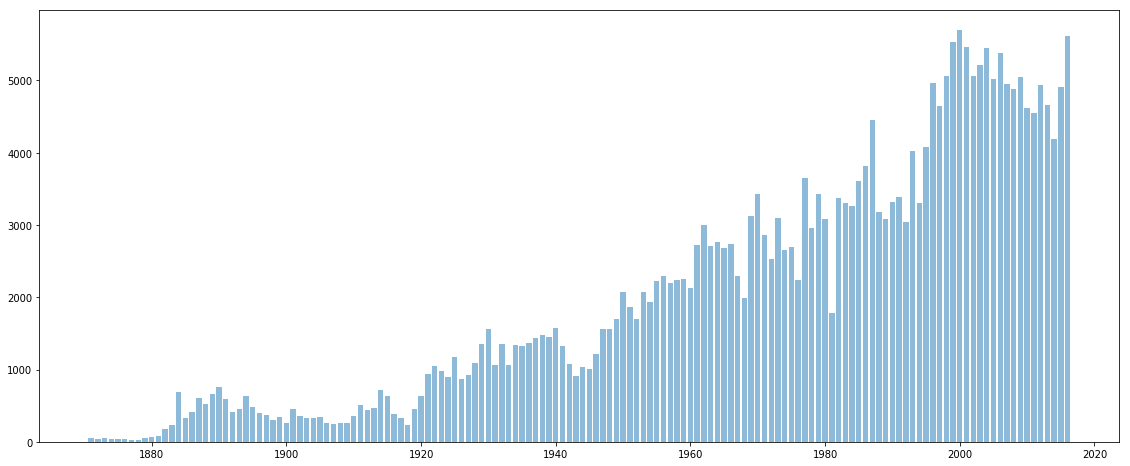

In [7]:
import matplotlib.pyplot as plot
graphdf = df.groupby('yearID',as_index=False)['HR'].sum()
axes = plot.figure().add_axes([0.25, 0.25, 2.5, 1.5])
axes.bar(graphdf['yearID'], graphdf['HR'], align='center', alpha=0.5)

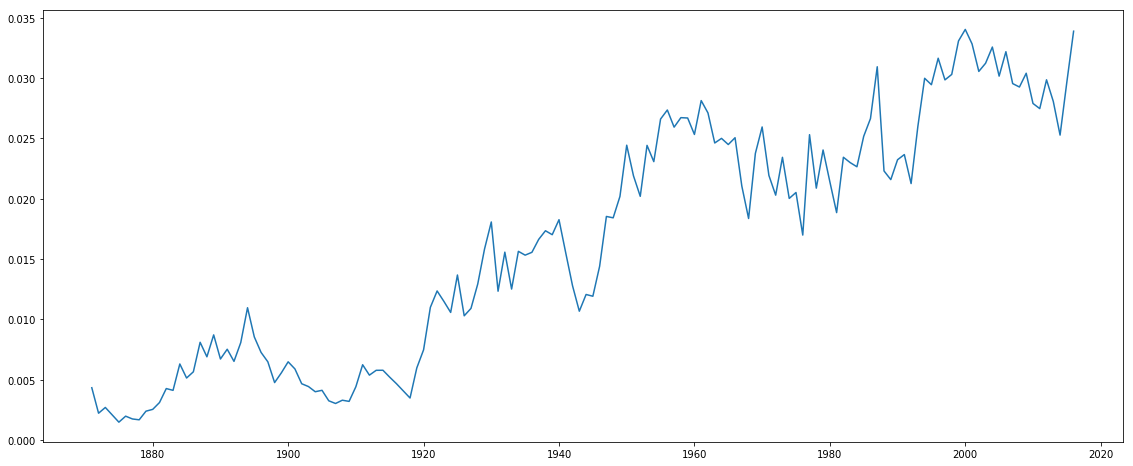

In [176]:
newdf = df.groupby('yearID',as_index=False).mean()
newdf['Avg'] = newdf['HR']/newdf['AB']

# Add set of axes to figure
axes = plot.figure().add_axes([0.2, 0.2, 2.5, 1.5])
axes.plot(newdf['yearID'], newdf['Avg'])
